In [15]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/CC GENERAL.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

# Reemplazar valores atípicos con la mediana
for col in df.select_dtypes(include=['number']):
    # Calcular la mediana y el rango intercuartil (IQR)
    median = df[col].median()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

    # Definir límites superior e inferior para valores atípicos
    upper_limit = median + 1.5 * IQR
    lower_limit = median - 1.5 * IQR

    # Reemplazar valores atípicos con la mediana
    df[col] = np.where((df[col] > upper_limit) | (df[col] < lower_limit), median, df[col])

# Manejo de valores nulos con SimpleImputer
imputer = SimpleImputer(strategy='mean') # Puedes cambiar 'mean' a 'median' u otra estrategia si lo deseas
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Estandarización de variables
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Selección de características relevantes
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
df = df[selected_features]

df

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-1.087646,-0.760784,-0.721027,0.188617,-0.226388,-0.331676,-0.753905,-1.174555,-1.177587,-0.967628
1,0.155965,-1.093520,-0.721027,-0.808710,-0.226388,-0.331676,-1.102637,1.924874,0.173896,0.223203
2,2.579292,1.603143,0.249241,-0.808710,-0.226388,-0.331676,0.989757,2.183160,-0.310573,2.393152
3,1.341447,0.166187,0.249241,-0.808710,-0.226388,3.014994,-0.928271,2.183160,-1.593909,0.564823
4,0.073006,-1.037715,-0.312493,-0.808710,-0.226388,-0.331676,-0.928271,-1.071241,-0.194491,-0.242237
...,...,...,...,...,...,...,...,...,...,...
8945,-1.106184,-0.078151,-0.721027,2.234705,-0.226388,-0.331676,-0.056440,-1.174555,-0.922201,-1.592026
8946,-1.120094,-0.047180,-0.721027,2.327538,-0.226388,-0.331676,-0.056440,-1.174555,-1.024802,0.564823
8947,-1.113796,-0.589881,-0.721027,0.700871,-0.226388,-0.331676,-0.230806,-1.174555,-1.426246,-1.360989
8948,-1.128649,-1.093520,-0.721027,-0.808710,1.342888,-0.331676,-1.102637,-1.432841,-1.485497,-1.544696


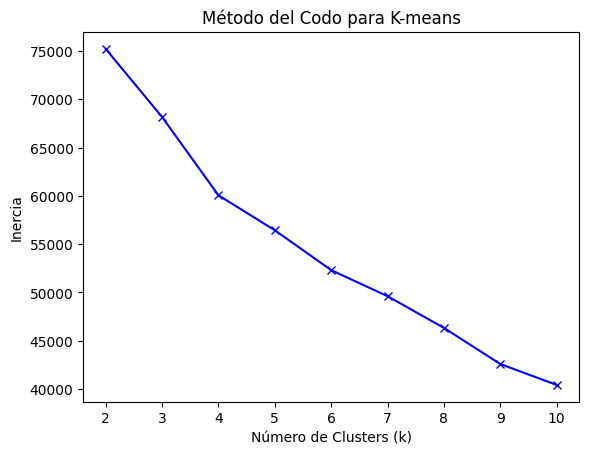

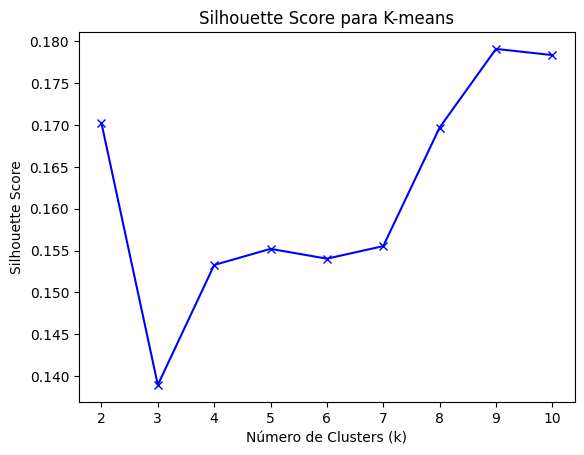

K-means con k=3:
Silhouette Score: 0.13895582988947744
DBSCAN con eps=0.5, min_samples=5:
Número de clusters: 68
Número de outliers: 5665
Silhouette Score: -0.4441935700400303
DBSCAN con eps=0.5, min_samples=10:
Número de clusters: 25
Número de outliers: 6564
Silhouette Score: -0.35056285777634943
DBSCAN con eps=0.5, min_samples=15:
Número de clusters: 11
Número de outliers: 7065
Silhouette Score: -0.30790257851742864
DBSCAN con eps=0.5, min_samples=20:
Número de clusters: 8
Número de outliers: 7387
Silhouette Score: -0.27383791150972275
DBSCAN con eps=1, min_samples=5:
Número de clusters: 30
Número de outliers: 1963
Silhouette Score: -0.2355943311768454
DBSCAN con eps=1, min_samples=10:
Número de clusters: 10
Número de outliers: 2711
Silhouette Score: -0.1008211479404343
DBSCAN con eps=1, min_samples=15:
Número de clusters: 8
Número de outliers: 3204
Silhouette Score: -0.043004035441736345
DBSCAN con eps=1, min_samples=20:
Número de clusters: 3
Número de outliers: 3781
Silhouette Scor

In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# K-means
inertia = []
silhouette_avg = []
k_values = range(2, 11)  # Prueba diferentes números de clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df, kmeans.labels_))

# Método del codo
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()

# Silhouette score
plt.plot(k_values, silhouette_avg, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para K-means')
plt.show()

# Elegir el número óptimo de clusters (ejemplo: k=3 según el método del codo y Silhouette)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)
print(f"K-means con k={optimal_k}:")
print(f"Silhouette Score: {silhouette_score(df, kmeans.labels_)}")


# DBSCAN
epsilon_values = [0.5, 1, 1.5, 2, 2.5]
min_samples_values = [5, 10, 15, 20]

for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df)
        labels = dbscan.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print(f"DBSCAN con eps={eps}, min_samples={min_samples}:")
        print(f"Número de clusters: {n_clusters_}")
        print(f"Número de outliers: {n_noise_}")

        if n_clusters_ > 0 : # Calcula silhouette solo si existen clusters
            print(f"Silhouette Score: {silhouette_score(df, labels)}")


K-means con k=3:
Calinski-Harabasz Index: 1400.1682837432918
DBSCAN con eps=1.5, min_samples=5:
Calinski-Harabasz Index: 288.88591224613504


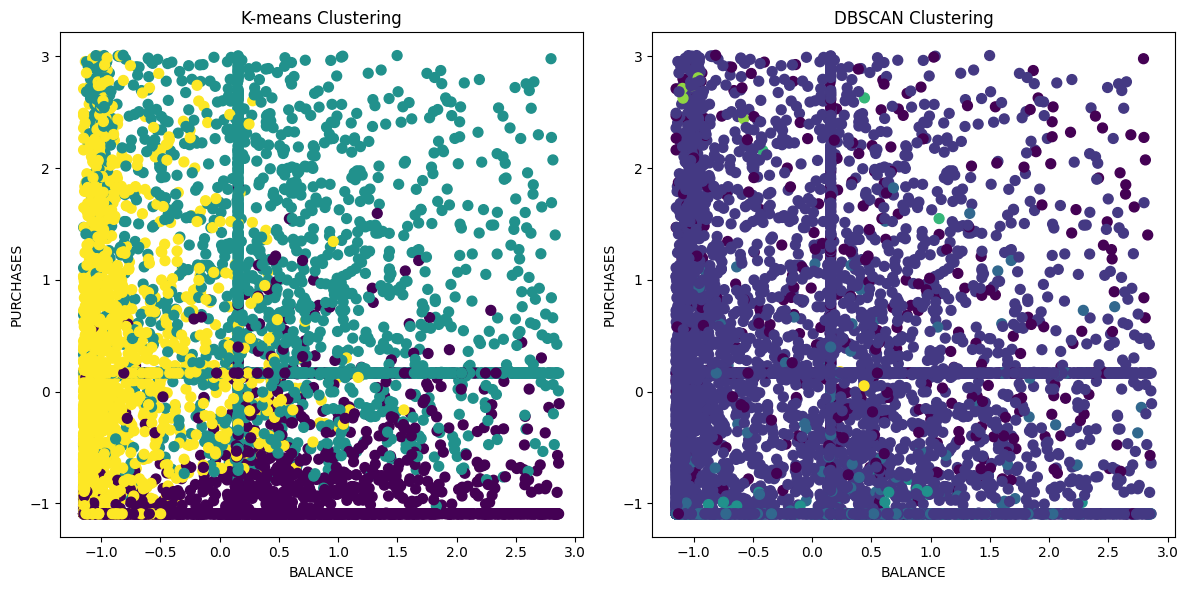


Resultados:
K-means Silhouette Score: 0.13895582988947744
K-means Calinski-Harabasz Index: 1400.1682837432918
DBSCAN Silhouette Score: 0.1467586000467848
DBSCAN Calinski-Harabasz Index: 288.88591224613504
No hay un modelo claramente mejor, se requiere más analisis


In [21]:
from sklearn.metrics import calinski_harabasz_score

# K-means
# Calcula Calinski-Harabasz para K-means
kmeans_ch_score = calinski_harabasz_score(df, kmeans.labels_)
print(f"K-means con k={optimal_k}:")
print(f"Calinski-Harabasz Index: {kmeans_ch_score}")

# DBSCAN
# Busca los mejores parámetros para DBSCAN (ejemplo)
best_eps = 1.5
best_min_samples = 5
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df)
labels = dbscan.labels_

# Calcula Calinski-Harabasz para DBSCAN
dbscan_ch_score = calinski_harabasz_score(df, labels)
print(f"DBSCAN con eps={best_eps}, min_samples={best_min_samples}:")
print(f"Calinski-Harabasz Index: {dbscan_ch_score}")

# Visualización de los agrupamientos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['BALANCE'], df['PURCHASES'], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')


plt.subplot(1, 2, 2)
plt.scatter(df['BALANCE'], df['PURCHASES'], c=dbscan.labels_, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

plt.tight_layout()
plt.show()

# Resultados
print("\nResultados:")
print(f"K-means Silhouette Score: {silhouette_score(df, kmeans.labels_)}")
print(f"K-means Calinski-Harabasz Index: {kmeans_ch_score}")
print(f"DBSCAN Silhouette Score: {silhouette_score(df, labels)}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_ch_score}")

#Determina el mejor modelo
if kmeans_ch_score > dbscan_ch_score and silhouette_score(df, kmeans.labels_) > silhouette_score(df, labels):
  print("K-means es el mejor modelo")
elif dbscan_ch_score > kmeans_ch_score and silhouette_score(df, labels) > silhouette_score(df, kmeans.labels_):
  print("DBSCAN es el mejor modelo")
else:
  print("No hay un modelo claramente mejor, se requiere más analisis")

Ni K-means ni DBSCAN muestran ser claramente superiores para la segmentación de los datos.  Se necesitan más análisis para determinar el mejor enfoque.  Aunque K-means tiene un índice de Calinski-Harabasz más alto, las puntuaciones de silueta son muy similares, sugiriendo que ambos modelos tienen una capacidad similar para separar los grupos, pero no son óptimos.

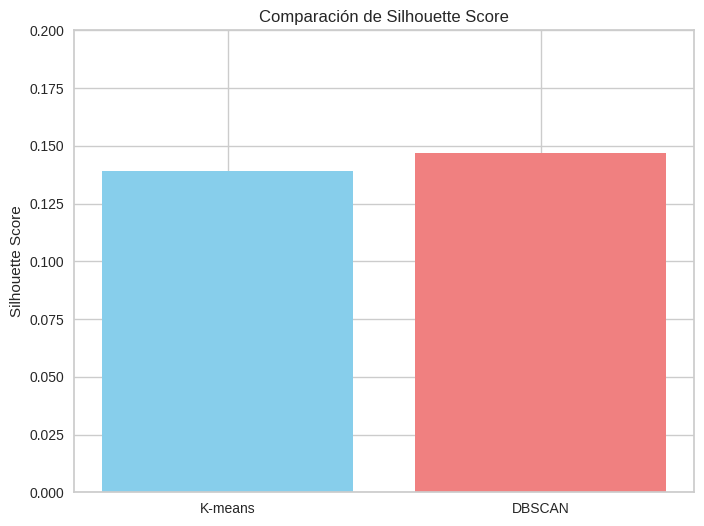

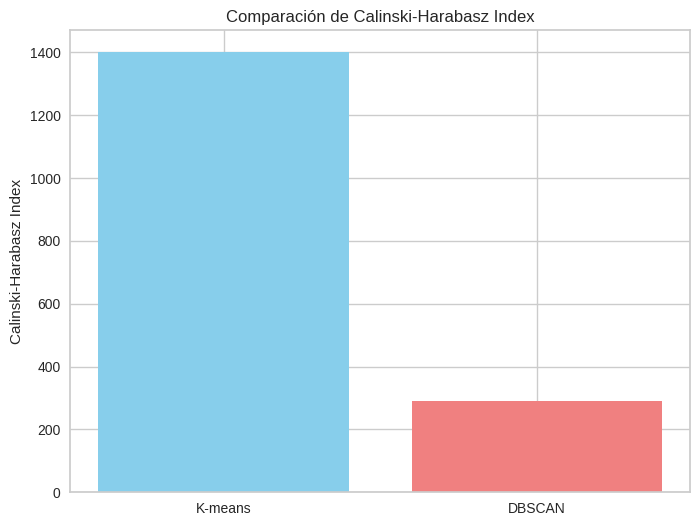

Reporte de Agrupamiento:
------------------------------

Comparación de Modelos:
K-means vs. DBSCAN

Resultados:
K-means Silhouette Score: 0.13895582988947744
K-means Calinski-Harabasz Index: 1400.1682837432918
DBSCAN Silhouette Score: 0.1467586000467848
DBSCAN Calinski-Harabasz Index: 288.88591224613504

Análisis:
El índice de Calinski-Harabasz de K-means es significativamente mayor que el de DBSCAN, lo que sugiere que K-means crea clusters más separados y definidos. Sin embargo, la diferencia en las puntuaciones de Silhouette es mínima, lo que indica que la capacidad de ambos algoritmos para separar los clusters es similar.

Modelo Preferido:
En este caso específico, se prefiere **K-means**. Si bien las puntuaciones de Silhouette son similares, el índice Calinski-Harabasz mucho mayor de K-means indica una mejor separación entre los grupos.

Limitaciones:
K-means:
- Requiere definir el número de clusters (k) de antemano, lo que puede ser difícil sin conocimiento previo de los datos.
-

In [26]:
import matplotlib.pyplot as plt

# Datos proporcionados
kmeans_silhouette = 0.13895582988947744
kmeans_calinski = 1400.1682837432918
dbscan_silhouette = 0.1467586000467848
dbscan_calinski = 288.88591224613504

# Gráfica comparativa de Silhouette Score
plt.figure(figsize=(8, 6))
plt.bar(['K-means', 'DBSCAN'], [kmeans_silhouette, dbscan_silhouette], color=['skyblue', 'lightcoral'])
plt.title('Comparación de Silhouette Score')
plt.ylabel('Silhouette Score')
plt.ylim(0, 0.2)  # Ajustar el rango del eje y
plt.show()

# Gráfica comparativa de Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.bar(['K-means', 'DBSCAN'], [kmeans_calinski, dbscan_calinski], color=['skyblue', 'lightcoral'])
plt.title('Comparación de Calinski-Harabasz Index')
plt.ylabel('Calinski-Harabasz Index')
plt.show()


print("Reporte de Agrupamiento:")
print("-" * 30)

print("\nComparación de Modelos:")
print("K-means vs. DBSCAN")

print("\nResultados:")
print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"K-means Calinski-Harabasz Index: {kmeans_calinski}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_calinski}")

print("\nAnálisis:")
print("El índice de Calinski-Harabasz de K-means es significativamente mayor que el de DBSCAN, lo que sugiere que K-means crea clusters más separados y definidos. Sin embargo, la diferencia en las puntuaciones de Silhouette es mínima, lo que indica que la capacidad de ambos algoritmos para separar los clusters es similar.")


print("\nModelo Preferido:")
print("En este caso específico, se prefiere **K-means**. Si bien las puntuaciones de Silhouette son similares, el índice Calinski-Harabasz mucho mayor de K-means indica una mejor separación entre los grupos.")

print("\nLimitaciones:")
print("K-means:")
print("- Requiere definir el número de clusters (k) de antemano, lo que puede ser difícil sin conocimiento previo de los datos.")
print("- Es sensible a la inicialización de los centroides, lo que podría llevar a soluciones locales subóptimas.")
print("- Asume una forma esférica para los grupos y puede no ser adecuado para grupos con formas complejas.")

print("\nDBSCAN:")
print("- Es sensible a los parámetros epsilon (radio del vecindario) y min_samples (número mínimo de puntos en un vecindario).")
print("- Puede tener problemas para clasificar correctamente clusters con diferentes densidades.")
print("- No escala tan bien como K-means para conjuntos de datos extremadamente grandes.")


print("\nConclusión:")
print("Si bien K-means parece ser mejor en este caso particular, es necesario tener en cuenta las limitaciones de ambos modelos.  La mejor opción depende de la naturaleza específica de los datos y de los objetivos de la segmentación. Se debe realizar más análisis para determinar si estos resultados son consistentes en conjuntos de datos similares o bajo otras configuraciones.")
